In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df_train= pd.read_csv("C:\\Users\\PHUONG THANH\\Desktop\\MY DOCUMENTS\\Python2\\Project Python2\\gender_classification25403\\train.csv")
df_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.5,0,0,0,0,Female
1,1,12.6,5.6,0,0,0,0,Female
2,0,13.0,6.5,1,1,1,1,Male
3,1,12.5,6.9,1,0,1,1,Male
4,1,13.7,6.1,0,0,1,0,Female
...,...,...,...,...,...,...,...,...
2745,1,15.2,5.9,1,1,0,1,Male
2746,1,12.8,6.4,0,1,1,0,Male
2747,0,14.5,6.6,1,1,1,1,Male
2748,1,14.9,6.7,1,1,1,1,Male


In [3]:
df_test= pd.read_csv("C:\\Users\\PHUONG THANH\\Desktop\\MY DOCUMENTS\\Python2\\Project Python2\\gender_classification25403\\test.csv")
df_test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,13.6,6.0,1,1,1,1,Male
1,1,12.0,6.1,0,0,0,0,Female
2,1,12.7,6.8,1,1,1,1,Male
3,0,12.0,5.1,0,0,0,0,Female
4,1,13.4,5.5,0,1,0,0,Female
...,...,...,...,...,...,...,...,...
2246,1,13.7,5.5,1,1,1,0,Male
2247,1,13.7,7.1,1,1,1,1,Male
2248,1,13.3,5.1,0,0,0,0,Female
2249,1,14.6,6.5,1,1,0,1,Male


In [4]:
df = pd.concat([df_train,df_test], axis=0, ignore_index=True)
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.5,0,0,0,0,Female
1,1,12.6,5.6,0,0,0,0,Female
2,0,13.0,6.5,1,1,1,1,Male
3,1,12.5,6.9,1,0,1,1,Male
4,1,13.7,6.1,0,0,1,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.7,5.5,1,1,1,0,Male
4997,1,13.7,7.1,1,1,1,1,Male
4998,1,13.3,5.1,0,0,0,0,Female
4999,1,14.6,6.5,1,1,0,1,Male


<Axes: xlabel='forehead_width_cm', ylabel='forehead_height_cm'>

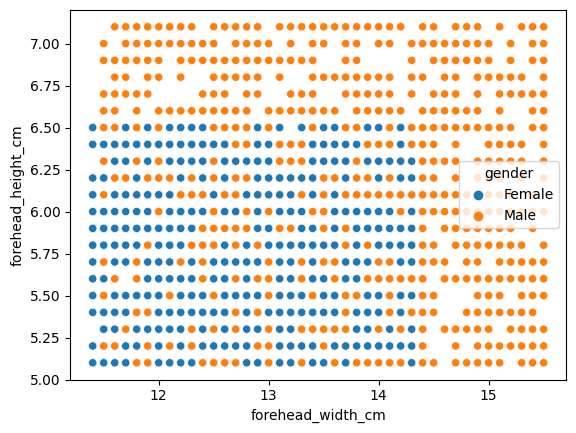

In [5]:
sns.scatterplot( data= df_train, x= 'forehead_width_cm', y = 'forehead_height_cm', hue= 'gender')

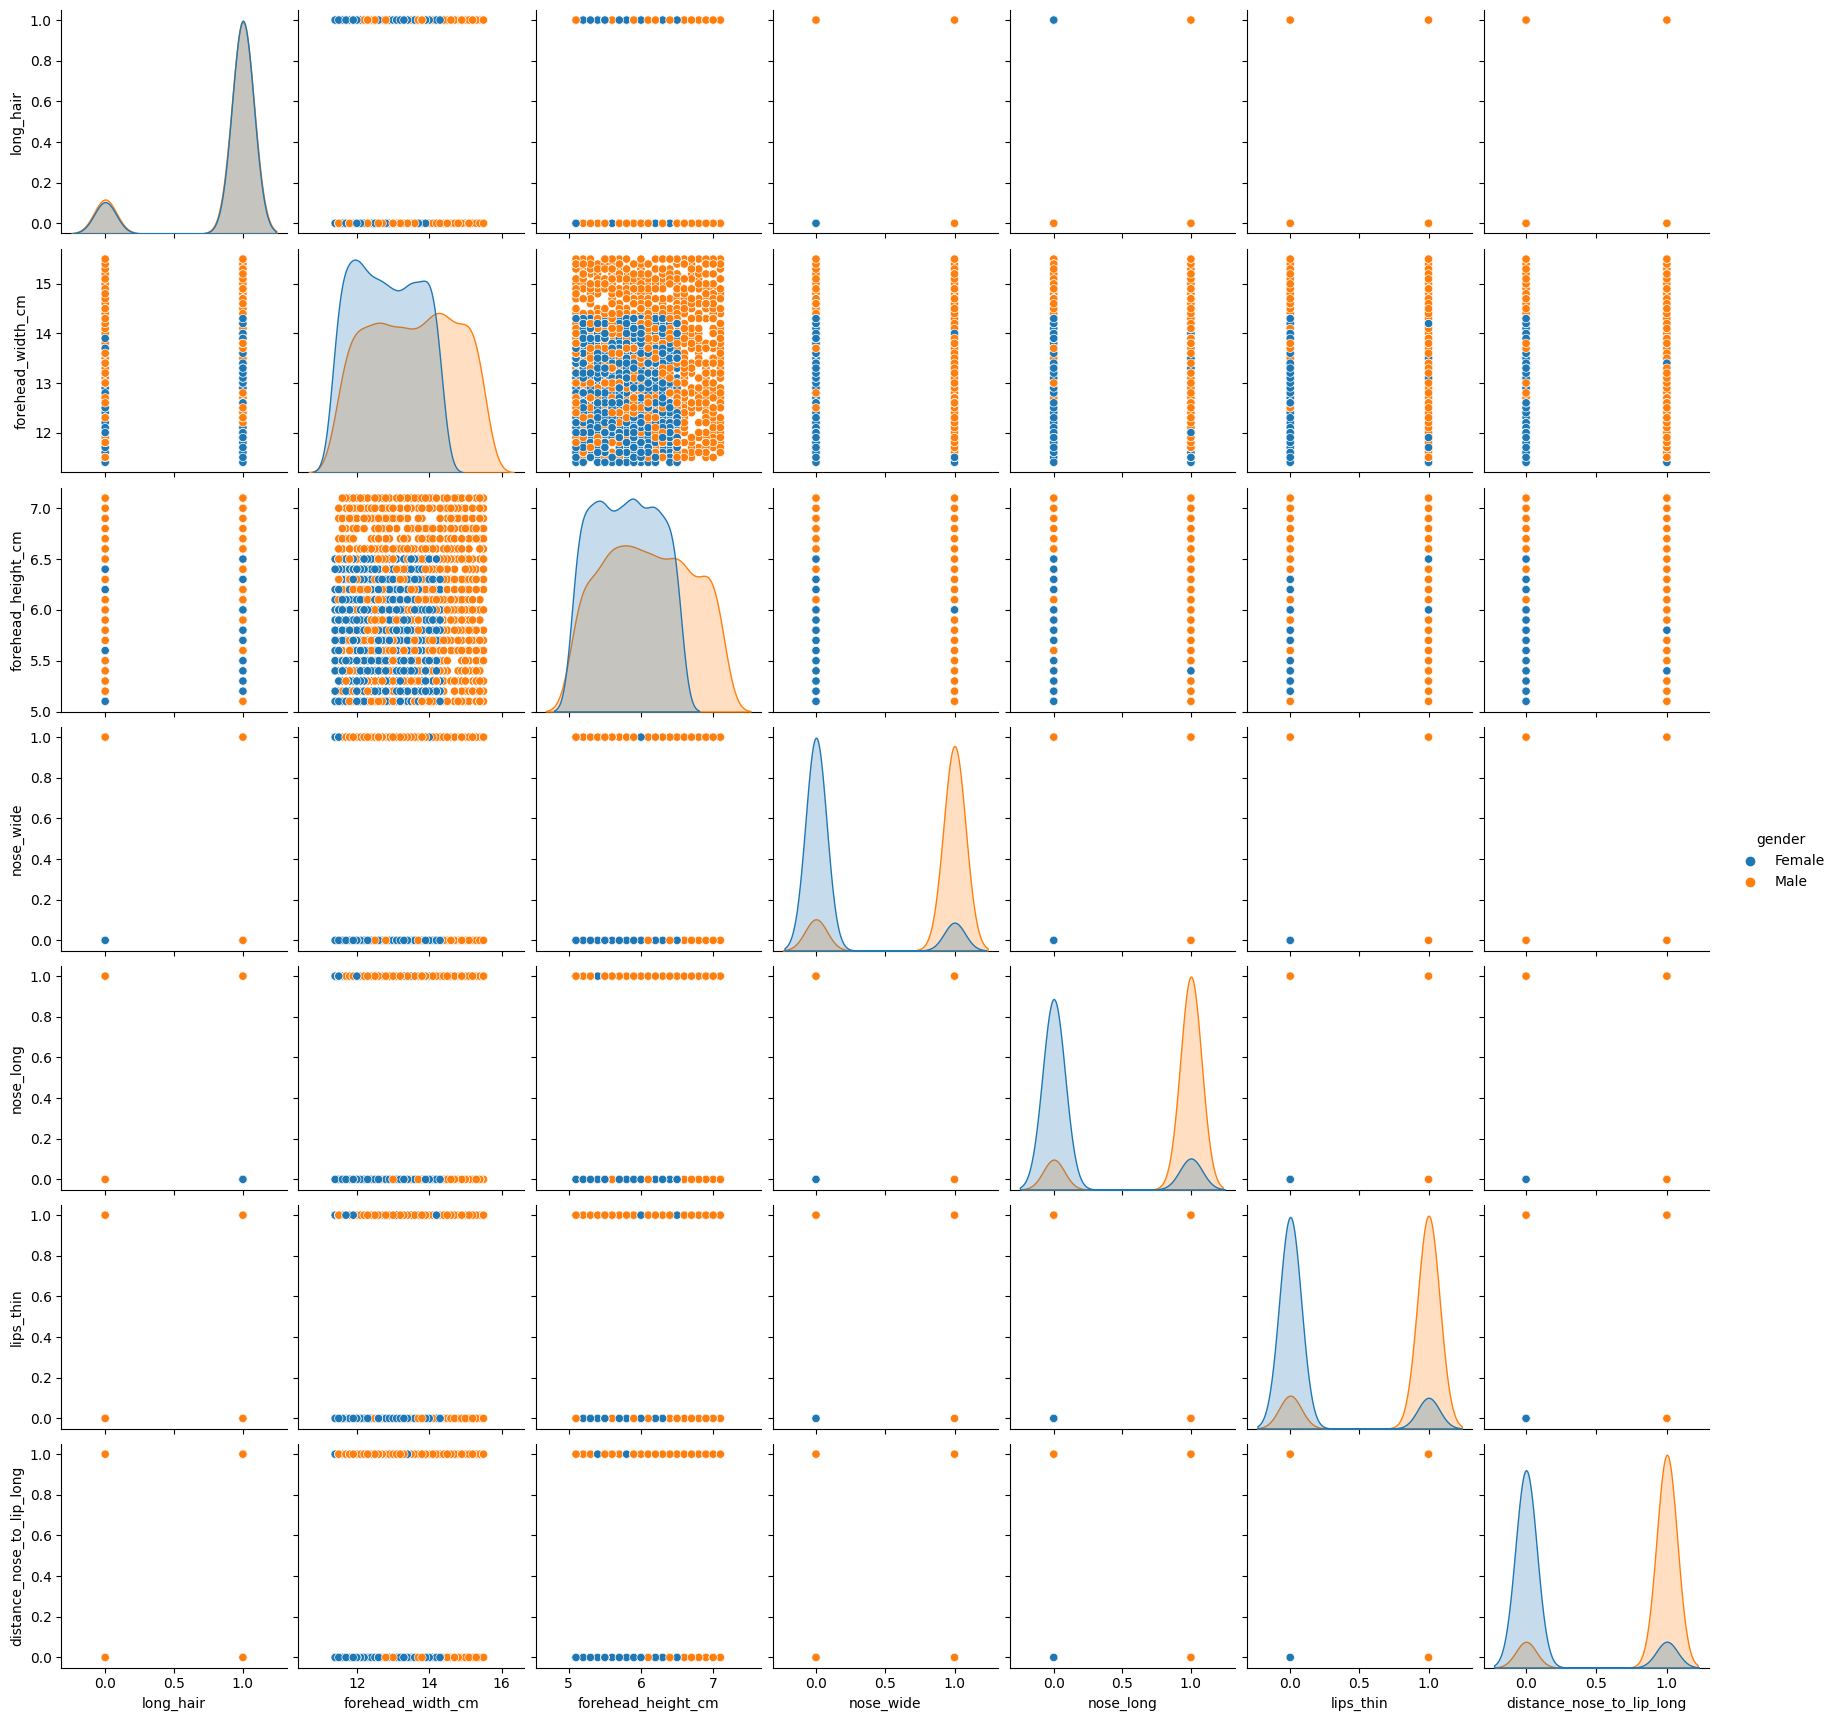

In [6]:
sns.pairplot(data=df_train,
             hue='gender')

Look at two charts above, we can see the data is imbalanced Classification.

In [7]:
# Logistic Regression:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split  

In [8]:
l= []
for gender in df['gender']:
    if gender == 'Female':
        l.append(0)
    else:
        l.append(1)
        
df['is_gender']=l
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,is_gender
0,1,11.8,6.5,0,0,0,0,Female,0
1,1,12.6,5.6,0,0,0,0,Female,0
2,0,13.0,6.5,1,1,1,1,Male,1
3,1,12.5,6.9,1,0,1,1,Male,1
4,1,13.7,6.1,0,0,1,0,Female,0
...,...,...,...,...,...,...,...,...,...
4996,1,13.7,5.5,1,1,1,0,Male,1
4997,1,13.7,7.1,1,1,1,1,Male,1
4998,1,13.3,5.1,0,0,0,0,Female,0
4999,1,14.6,6.5,1,1,0,1,Male,1


In [9]:
df['one']=1

In [10]:
X= df[['one','long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long']]
y= df['is_gender']

In [11]:
X_train, X_test,y_train, y_test = train_test_split(X, y,random_state=101, test_size= 0.3, stratify= y ) 

In [12]:
X_train.shape

(3500, 8)

In [13]:
logistic_model = LogisticRegression(fit_intercept= False)

In [14]:
logistic_model

LogisticRegression(fit_intercept=False)

In [15]:
logistic_model.fit(X_train, y_train)

LogisticRegression(fit_intercept=False)

In [16]:
y_train_predict= logistic_model.predict(X_train)
y_test_predict = logistic_model.predict(X_test)

In [17]:
print(classification_report(y_test_predict, y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       746
           1       0.96      0.95      0.96       755

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
cf= confusion_matrix(y_test, y_test_predict)
cf

array([[715,  36],
       [ 31, 719]], dtype=int64)

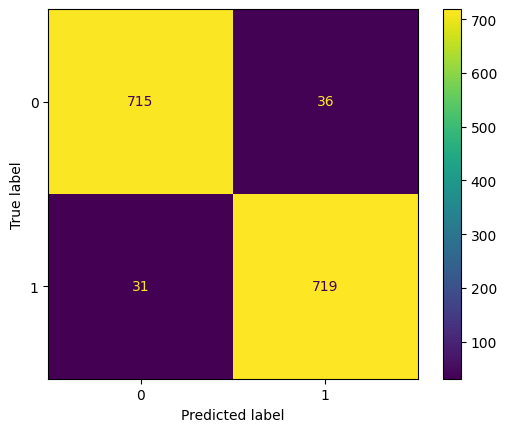

In [20]:
cfplot= ConfusionMatrixDisplay(cf)
cfplot.plot()

In [21]:
# ID3 model with Pruning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [22]:
X= df[['one','long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long']]
y= df['is_gender']

In [23]:
X_train, X_test,y_train, y_test = train_test_split(X, y,random_state=101, test_size= 0.3, stratify= y ) 

In [24]:
pruning_model= DecisionTreeClassifier( criterion= "entropy", max_depth=3)
pruning_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
y_pred_pruning = pruning_model.predict(X_test)
print(classification_report (y_pred_pruning, y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       754
           1       0.96      0.96      0.96       747

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [26]:
cf_id3_pruning= confusion_matrix(y_test, y_pred_pruning)
cf_id3_pruning

array([[724,  27],
       [ 30, 720]], dtype=int64)

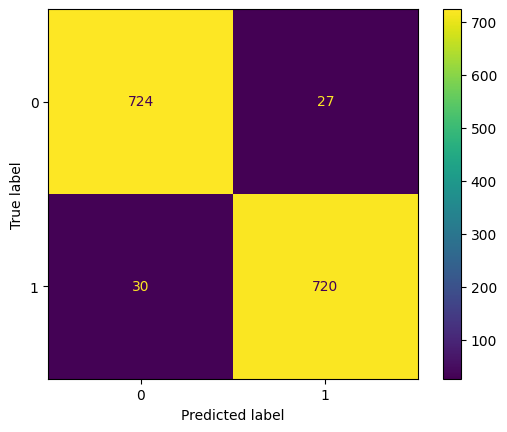

In [27]:
cf_id3_pruning_plot= ConfusionMatrixDisplay(cf_id3_pruning)
cf_id3_pruning_plot.plot()

We can observe from two prediction models that using ID3 model with pruning will result in more better outcomes for the dataset file.

Comparing the ID3 model with pruning to the Logistic Regression model, Confussion Matrix demonstrates an improvement in the ratio of FPs (False Positives) and FNs (False Negatives).